In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook
import seaborn as sns

In [2]:
df_ALL = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
#df_ALL.head()
df_ffq = pd.read_sas("./hn16_ffq.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
#df_ffq.head()

,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,FQ_FE,FQ_NA,FQ_K,FQ_VA,FQ_RETIN,FQ_CAROT,FQ_B1,FQ_B2,FQ_NIAC,FQ_VITC
0,2018.05.31.,A651172801,A6511728,2016.0,1.0,1.0,2.0,A651,1.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018.05.31.,A651172802,A6511728,2016.0,1.0,1.0,2.0,A651,2.0,57.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018.05.31.,A651183001,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,41.0,...,12.879218,3671.647791,2226.426572,459.311661,84.990392,2158.129699,1.628015,1.13383,13.896055,79.150355
3,2018.05.31.,A651183002,A6511830,2016.0,1.0,1.0,2.0,A651,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.05.31.,A651183003,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = pd.merge(df_ALL, df_ffq, how='left', on=[
                                  'mod_d', # 최종DB 수정일
                                  'ID', # 개인 아이디
                                  'ID_fam', # 가구 아이디
                                  'year', # 조사연도
                                  'region', # 17개 시도
                                  'town_t', # 동/읍면 구분
                                  'apt_t', # 아파트 구분, 1.일반, 2.아파트
                                  'psu', # 조사구번호
                                  'sex', # 성별, 1.남자, 2.여자
                                  'age', # 만나이, 80은 80이상 포함(탑코딩)
                                  'age_month', # 만 1~6세의 경우 개월수(월령)
                                  'incm', # 소득 사분위수(개인), 1.하, 2.중하, 3.중상, 4.상
                                  'ho_incm', # 소득 사분위수(가구),  1.하, 2.중하, 3.중상, 4.상
                                  'edu', # 교육수준 재분류 코드, 1.초졸이하, 2.중졸, 3.고졸, 4.대졸이상
                                  'occp', # 직업재분류 및 실업/비경제활동 상태코드
                                  'wt_hs', # 가구조사 가중치
                                  'wt_itvex', # 건강설문-검진조사 가중치
                                  'wt_pft', # 폐기능검사 가중치(만40세이상)
                                  'wt_hm', # 중금속검사 가중치(만10세이상)
                                  'wt_ntr', # 영양조사 가중치
                                  'wt_tot', # 건강설문-검진조사 & 영양조사 가중치
                                  'wt_pfhm', # 폐기능검사 & 중금속검사 가중치(만40세이상)
                                  'wt_pfnt', # 폐기능검사 & 영양조사 가중치(만40세이상)
                                  'wt_hmnt', # 중금속검사 & 영양조사 가중치(만10세이상)
                                  'wt_pfhmnt', # 폐기능검사 & 중금속검사 & 영양조사 가중치(만40세이상)
                                  'kstrata' # 분산추정 층
                                 ])
df.shape

(8150, 1176)

### 나이 필터링


In [4]:
df_data = df.loc[(18 < df.age), :]
df_data.shape

(6382, 1176)

### 혈압치료여부 필터링

In [5]:
df_data = df_data.loc[(1 < df_data.DI1_pt) | (df_data.DI1_pt < 1), :]
df_data.shape

(4727, 1176)

In [6]:
column_list = ['sex', 'age', 'incm', 'ho_incm', 'edu', 'occp','HE_sbp','HE_dbp']

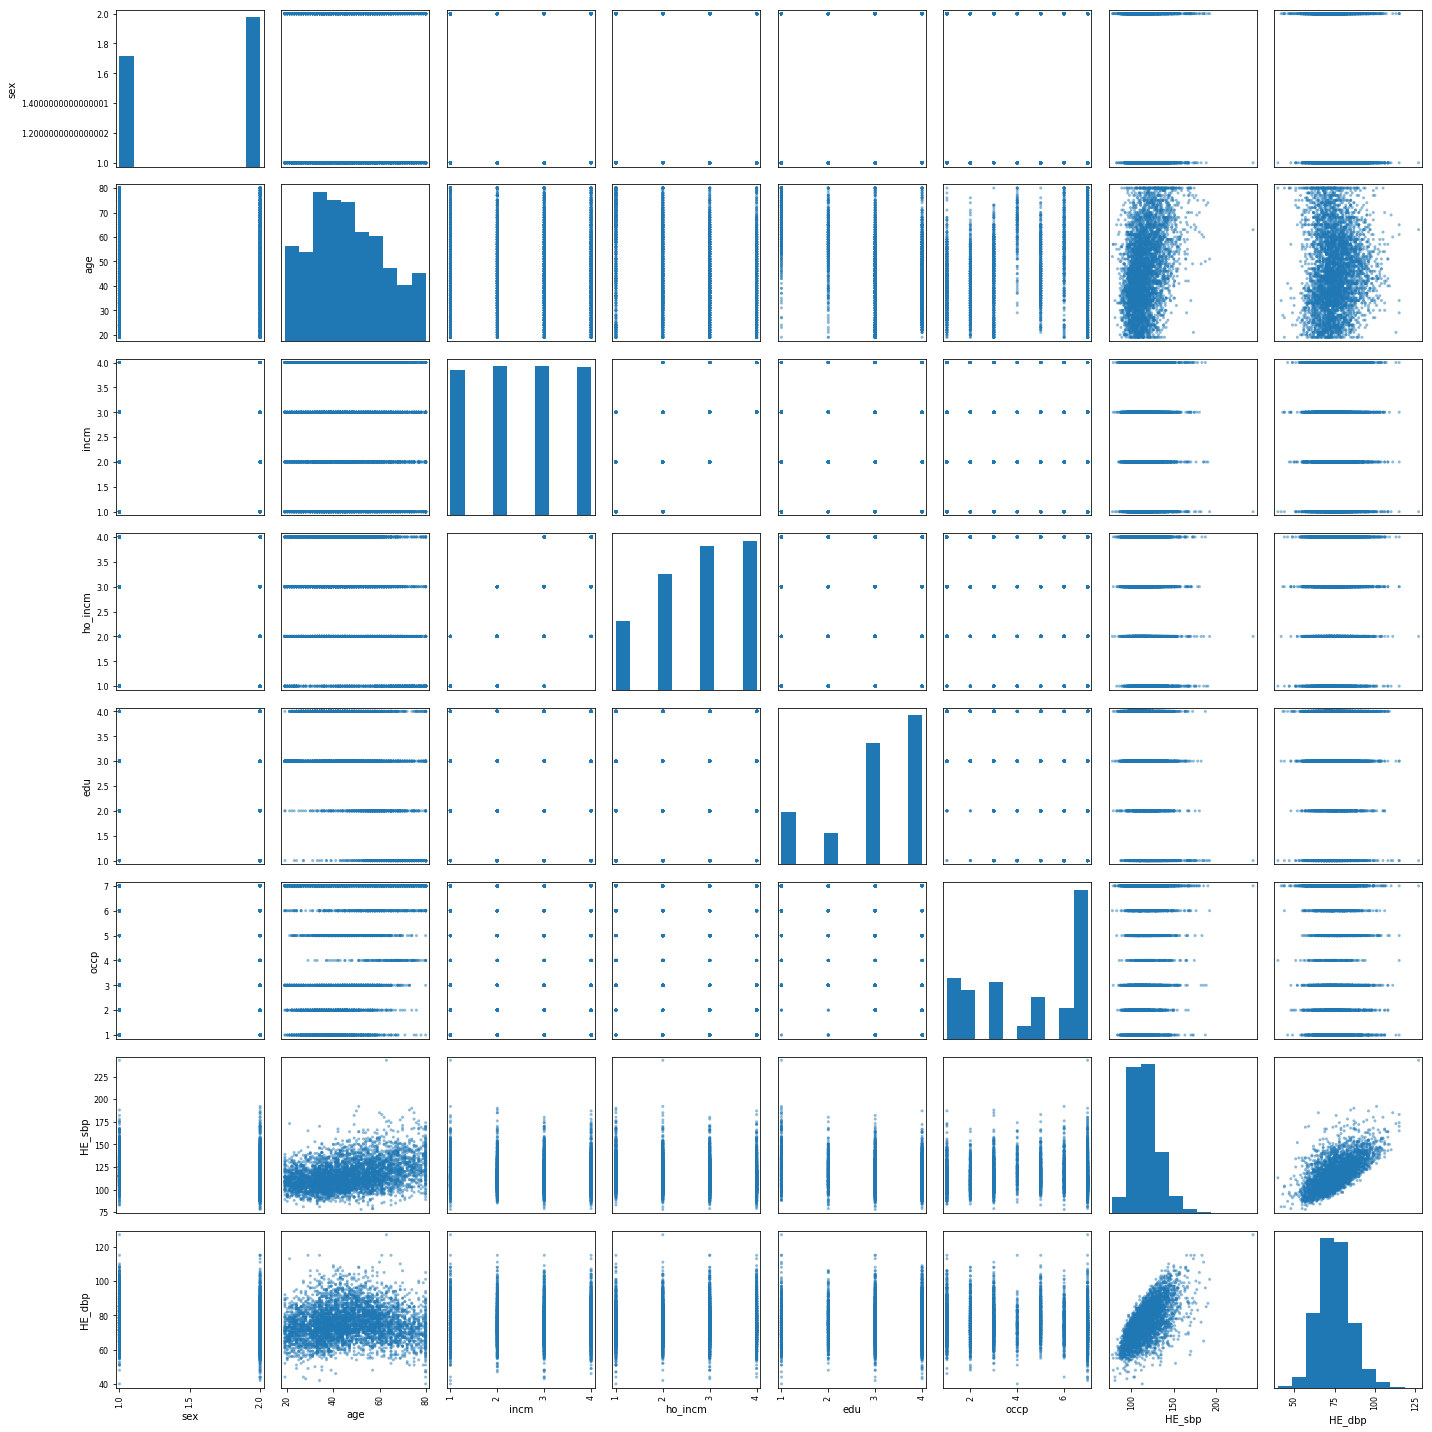

In [7]:
pd.plotting.scatter_matrix(pd.DataFrame(df_data, columns=column_list), figsize=[20,20])
plt.tight_layout()
#plt.savefig("20181103_base.png")
plt.show()

In [8]:
import numpy as np

In [55]:
[d for d in df_data.HE_sbp if d is np.isnan ]

[]

In [51]:
arrX1 = []
for d in df_data.age :
    if d is np.isnan or d == '':
        arrX1.append([-1])
    else :
        arrX1.append([d])
#arrX1 = np.array([ [d] for d in df_data['age']])

In [47]:
arrX1

[[57.0],
 [41.0],
 [39.0],
 [38.0],
 [44.0],
 [38.0],
 [35.0],
 [49.0],
 [44.0],
 [51.0],
 [49.0],
 [45.0],
 [42.0],
 [62.0],
 [36.0],
 [32.0],
 [36.0],
 [41.0],
 [47.0],
 [40.0],
 [46.0],
 [46.0],
 [38.0],
 [43.0],
 [43.0],
 [40.0],
 [43.0],
 [52.0],
 [51.0],
 [24.0],
 [53.0],
 [21.0],
 [45.0],
 [46.0],
 [42.0],
 [38.0],
 [39.0],
 [40.0],
 [40.0],
 [36.0],
 [66.0],
 [63.0],
 [31.0],
 [36.0],
 [37.0],
 [35.0],
 [33.0],
 [29.0],
 [30.0],
 [34.0],
 [34.0],
 [35.0],
 [36.0],
 [47.0],
 [21.0],
 [42.0],
 [41.0],
 [48.0],
 [51.0],
 [47.0],
 [75.0],
 [55.0],
 [20.0],
 [47.0],
 [45.0],
 [42.0],
 [46.0],
 [34.0],
 [32.0],
 [37.0],
 [55.0],
 [61.0],
 [33.0],
 [35.0],
 [36.0],
 [31.0],
 [54.0],
 [58.0],
 [53.0],
 [27.0],
 [26.0],
 [23.0],
 [75.0],
 [56.0],
 [20.0],
 [43.0],
 [37.0],
 [46.0],
 [43.0],
 [65.0],
 [62.0],
 [38.0],
 [55.0],
 [29.0],
 [25.0],
 [56.0],
 [78.0],
 [56.0],
 [53.0],
 [25.0],
 [46.0],
 [47.0],
 [72.0],
 [65.0],
 [70.0],
 [52.0],
 [62.0],
 [32.0],
 [70.0],
 [68.0],
 [60.0],
 

In [70]:
# arrY = np.array(df_data['HE_sbp'])
# arrY
arrY = []
nan_count = 0
for d in df_data.HE_dbp :
    try :
        int(d)
        arrY.append(d)
    except :
        arrY.append(-1)
        nan_count += 1

nan_count

17

In [71]:
arrY

[81.0,
 76.0,
 99.0,
 68.0,
 74.0,
 81.0,
 69.0,
 78.0,
 63.0,
 70.0,
 90.0,
 63.0,
 86.0,
 72.0,
 75.0,
 82.0,
 69.0,
 62.0,
 65.0,
 76.0,
 84.0,
 69.0,
 62.0,
 64.0,
 66.0,
 80.0,
 76.0,
 78.0,
 77.0,
 49.0,
 65.0,
 63.0,
 70.0,
 58.0,
 96.0,
 59.0,
 83.0,
 109.0,
 73.0,
 65.0,
 82.0,
 91.0,
 89.0,
 68.0,
 81.0,
 68.0,
 92.0,
 73.0,
 67.0,
 75.0,
 62.0,
 91.0,
 64.0,
 81.0,
 78.0,
 84.0,
 95.0,
 85.0,
 79.0,
 76.0,
 70.0,
 67.0,
 54.0,
 69.0,
 84.0,
 74.0,
 85.0,
 98.0,
 84.0,
 62.0,
 72.0,
 69.0,
 72.0,
 76.0,
 101.0,
 56.0,
 75.0,
 79.0,
 96.0,
 73.0,
 71.0,
 78.0,
 71.0,
 86.0,
 55.0,
 67.0,
 63.0,
 85.0,
 83.0,
 97.0,
 105.0,
 81.0,
 73.0,
 84.0,
 84.0,
 82.0,
 74.0,
 85.0,
 81.0,
 83.0,
 103.0,
 93.0,
 73.0,
 83.0,
 83.0,
 80.0,
 86.0,
 86.0,
 87.0,
 79.0,
 85.0,
 78.0,
 86.0,
 62.0,
 75.0,
 74.0,
 70.0,
 79.0,
 78.0,
 78.0,
 67.0,
 77.0,
 66.0,
 69.0,
 79.0,
 90.0,
 97.0,
 76.0,
 74.0,
 83.0,
 81.0,
 64.0,
 75.0,
 61.0,
 79.0,
 79.0,
 65.0,
 57.0,
 54.0,
 62.0,
 93.0,
 71.0,
 6

In [72]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=2)
model.fit(arrX1,arrY)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [73]:
import graphviz
from sklearn import tree

dot_data = tree.export_graphviz(model,out_file=None,feature_names=['Intake'], class_names=['Pressure'])

In [74]:
graph = graphviz.Source(dot_data) 
graph.render("HE_dbp")

'HE_dbp.pdf'

In [85]:
from sklearn.tree import DecisionTreeRegressor
import graphviz
from sklearn import tree

In [95]:
def data_clean(input_list, is_cap=False) :
    tmp_list = []
    for d in input_list :
        try :
            float(d)
            if is_cap :
                tmp_list.append([d])
            else :
                tmp_list.append(d)
        except :
            if is_cap :
                tmp_list.append([-1])
            else :
                tmp_list.append(-1)
    return tmp_list

In [105]:
def saveDTR(input_df, x_name, y_name) :
    arrX1 = data_clean(getattr(input_df,x_name).fillna(-1), is_cap=True)
    arrY = data_clean(getattr(input_df,y_name).fillna(-1))
    
    model = DecisionTreeRegressor(max_depth=2)
    model.fit(arrX1,arrY)

    dot_data = tree.export_graphviz(model,out_file=None,feature_names=[x_name], class_names=[y_name])

    graph = graphviz.Source(dot_data) 
    graph.render("%s+%s" % (x_name,y_name))

In [106]:
saveDTR(df_data, df_data.age.name, df_data.HE_dbp.name)

In [ ]:
skip_list = [
    df_data.age.name
    , df_data.age.name
]

for x_name in df_data.columns :
    if x_name in df_data.age.name : continue
    saveDTR(df_data, x_name, df_data.HE_dbp.name)    